### Import all dependencies

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 
import numpy as np 
import os

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
DATA_DIR = "Ct_Scan_Dataset"
BATCH_SIZE = 32
LEARNING_RATE = 1e-4

In [3]:
import cv2
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

In [4]:
#define size to which images are to be resized
IMAGE_SIZE = [224, 224] # feel free to change depending on dataset

# training config:
epochs = 5
batch_size = 3

#define paths
covid_path = 'Ct_Scan_Dataset/covidct'
noncovid_path = 'Ct_Scan_Dataset/normalct'

Penomoni = 'Ct_Scan_Dataset/Penomoni'
Boronsit = 'Ct_Scan_Dataset/Boronsit'
Possible_Covid = 'Ct_Scan_Dataset/Possible Covid'
possible_Penomoni = 'Ct_Scan_Dataset/possible Penomoni'



# Use glob to grab images from path .jpg or jpeg
covid_files = glob(covid_path + '/*')
noncovid_files = glob(noncovid_path + '/*')

Possible_Covid_files = glob(Possible_Covid + '/*')
Penomoni_files = glob(Penomoni + '/*')
Boronsit_files = glob(Boronsit + '/*')
possible_Penomoni_files = glob(possible_Penomoni + '/*')

In [5]:
# Visualize file variable contents
print("First 5 Covid Files: ",covid_files[0:5])
print("Total Count: ",len(covid_files))

print("First 5 NonCovid Files: ",noncovid_files[0:5])
print("Total Count: ",len(noncovid_files))

print("First 5 Possible_Covid Files: ",Possible_Covid_files[0:5])
print("Total Count: ",len(Possible_Covid_files))


print("First 5 Penomoni Files: ",Penomoni_files[0:5])
print("Total Count: ",len(Penomoni_files))

print("First 5 Boronsit Files: ",Boronsit_files[0:5])
print("Total Count: ",len(Boronsit_files))

print("First 5 possible_Penomoni Files: ",possible_Penomoni_files[0:5])
print("Total Count: ",len(possible_Penomoni_files))

First 5 Covid Files:  ['Ct_Scan_Dataset/covidct\\2020.02.10.20021584-p6-52%10.png', 'Ct_Scan_Dataset/covidct\\2020.02.10.20021584-p6-52%11.png', 'Ct_Scan_Dataset/covidct\\2020.02.10.20021584-p6-52%12.png', 'Ct_Scan_Dataset/covidct\\2020.02.10.20021584-p6-52%13.png', 'Ct_Scan_Dataset/covidct\\2020.02.10.20021584-p6-52%14.png']
Total Count:  24
First 5 NonCovid Files:  ['Ct_Scan_Dataset/normalct\\0.jpg', 'Ct_Scan_Dataset/normalct\\1%0.jpg', 'Ct_Scan_Dataset/normalct\\1%1.jpg', 'Ct_Scan_Dataset/normalct\\1%2.jpg', 'Ct_Scan_Dataset/normalct\\2%0.jpg']
Total Count:  19
First 5 Possible_Covid Files:  ['Ct_Scan_Dataset/Possible Covid\\2020.02.10.20021584-p6-52%10.png', 'Ct_Scan_Dataset/Possible Covid\\2020.02.10.20021584-p6-52%11.png', 'Ct_Scan_Dataset/Possible Covid\\2020.02.10.20021584-p6-52%12.png', 'Ct_Scan_Dataset/Possible Covid\\2020.02.10.20021584-p6-52%13.png', 'Ct_Scan_Dataset/Possible Covid\\2020.02.10.20021584-p6-52%14.png']
Total Count:  12
First 5 Penomoni Files:  ['Ct_Scan_Datas

In [6]:
# Fetch Images and Class Labels from Files
covid_labels = []
noncovid_labels = []
Possible_Covid_labels=[]
Penomoni_labels=[]
Boronsit_labels=[]
possible_Penomoni_labels=[]


covid_images=[]
noncovid_images=[]
Possible_Covid=[]
Penomoni=[]
Boronsit=[]
possible_Penomoni=[]


for i in range(len(covid_files)):
  image = cv2.imread(covid_files[i]) # read file 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # arrange format as per kera
  image = cv2.resize(image,(224,224)) # resize as per model
  covid_images.append(image) # append image
  covid_labels.append('CT_COVID') # append class label

for i in range(len(noncovid_files)):
  image = cv2.imread(noncovid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  noncovid_images.append(image)
  noncovid_labels.append('CT_NonCOVID')

for i in range(len(Possible_Covid_files)):
  image = cv2.imread(Possible_Covid_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  Possible_Covid.append(image)
  Possible_Covid_labels.append('Possible_Covid_files')

for i in range(len(Penomoni_files)):
  image = cv2.imread(Penomoni_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  Penomoni.append(image)
  Penomoni_labels.append('Penomoni_files')



for i in range(len(Boronsit_files)):
  image = cv2.imread(Boronsit_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  Boronsit.append(image)
  Boronsit_labels.append('Boronsit_files')



for i in range(len(possible_Penomoni_files)):
  image = cv2.imread(possible_Penomoni_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  possible_Penomoni.append(image)
  possible_Penomoni_labels.append('possible_Penomoni_files')


### Visualize First 40 Images from Data set

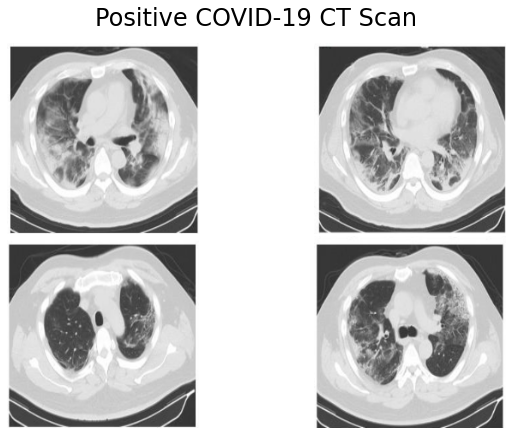

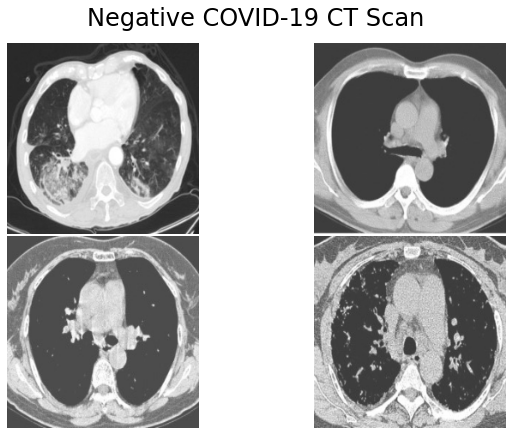

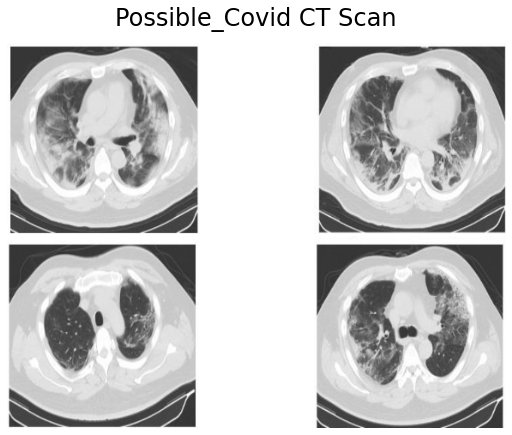

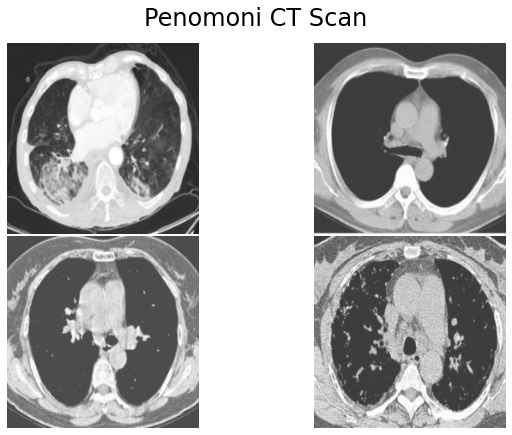

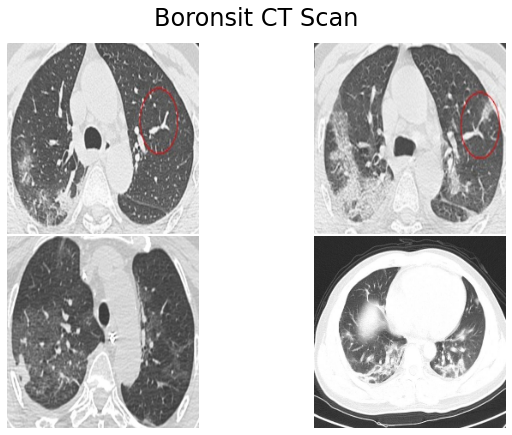

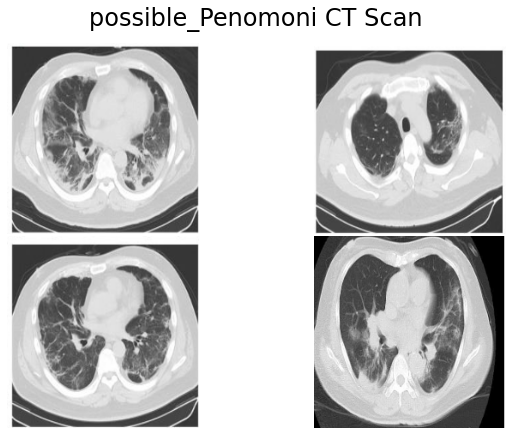

In [7]:
# look at a random image for fun
def plot_images(images, title):
    nrows, ncols = 2,2
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
    
    
plot_images(covid_images, 'Positive COVID-19 CT Scan')
plot_images(noncovid_images, 'Negative COVID-19 CT Scan')
plot_images(Possible_Covid, 'Possible_Covid CT Scan')
plot_images(Penomoni, 'Penomoni CT Scan')
plot_images(Boronsit, 'Boronsit CT Scan')
plot_images(possible_Penomoni, 'possible_Penomoni CT Scan')

### **Normalization**
#### Model takes images in the form of array of pixels. Hence convert into array and *normalize*

In [8]:
# Convert to array and Normalize to interval of [0,1,2,3,4,5]
covid_images = np.array(covid_images) / 255
noncovid_images = np.array(noncovid_images) / 255

Possible_Covid= np.array(Possible_Covid) / 255
Penomoni= np.array(Penomoni) / 255
Boronsit= np.array(Boronsit) / 255
possible_Penomoni= np.array(possible_Penomoni) / 255

In [9]:
print('shape of all images:')
print(covid_images.shape)
print(noncovid_images.shape)
print(Possible_Covid.shape)
print(Penomoni.shape)
print(Boronsit.shape)
print(possible_Penomoni.shape)
all_images=np.concatenate((covid_images,noncovid_images,Possible_Covid,
                           Penomoni,Boronsit,possible_Penomoni),axis=0)
print('total images:%s'%(str(all_images.shape)))

shape of all images:
(24, 224, 224, 3)
(19, 224, 224, 3)
(12, 224, 224, 3)
(16, 224, 224, 3)
(12, 224, 224, 3)
(12, 224, 224, 3)
total images:(95, 224, 224, 3)


In [10]:
print('length of the labels:')
print(len(covid_labels))
print(len(noncovid_labels))
print(len(Possible_Covid_labels))
print(len(Penomoni_labels))
print(len(Boronsit_labels))
print(len(possible_Penomoni_labels))
all_labels=np.array(covid_labels+noncovid_labels+Possible_Covid_labels+\
            Penomoni_labels+Boronsit_labels+possible_Penomoni_labels)      

all_labels=all_labels.reshape(-1,1)  
print("labels shape: %s"%(str(all_labels.shape)))

length of the labels:
24
19
12
16
12
12
labels shape: (95, 1)


###  Convert Categorical label to one-hot

In [11]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
onehot_labels = encoder.fit_transform(all_labels)
print(onehot_labels.shape)

(95, 6)


### **Train Test Split**

In [12]:
# Split into training and testing sets for both types of images
X_train,X_test,y_train,y_test=train_test_split(all_images,onehot_labels,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(76, 224, 224, 3)
(76, 6)
(19, 224, 224, 3)
(19, 6)


### Visualize a few images from Training and Test sets

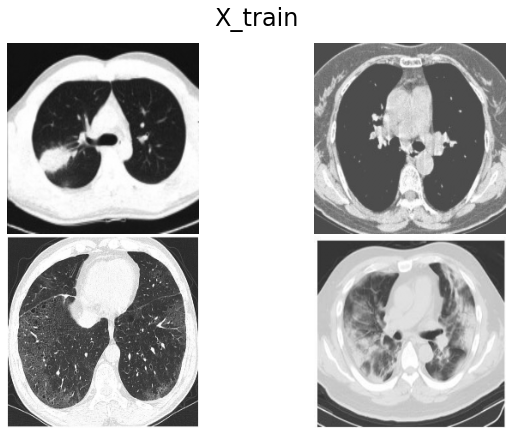

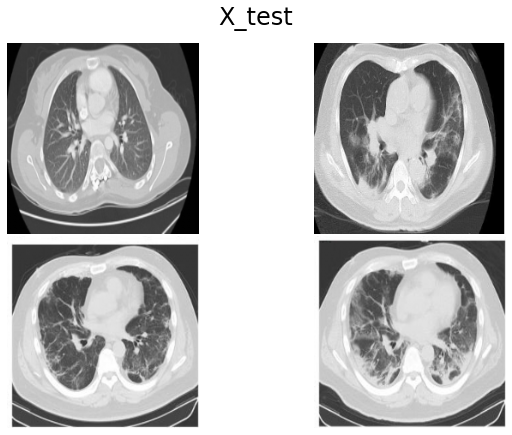

In [13]:
plot_images(X_train, 'X_train')
plot_images(X_test, 'X_test')
# y_train and y_test contain class lables 0 and 1 representing COVID and NonCOVID for X_train and X_test

### **Building and Visualizing model**

In [14]:
trainAug = ImageDataGenerator(
	rotation_range = 30,
	zoom_range = 0.2,
	width_shift_range = 0.2,
	height_shift_range = 0.2,
	horizontal_flip = True,
	fill_mode = "nearest")

In [15]:
mobileNet = MobileNetV2(
	weights = "imagenet", 
	include_top = False, 
	input_tensor = Input(shape = (224, 224, 3)))

mobileNet.summary()

for layer in mobileNet.layers:
	layer.trainable = False

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\ProgramData\Anaconda3\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

In [16]:
model = Sequential()

model.add(mobileNet)

model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(6, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Model) (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 5, 5, 256)         2949376   
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 5, 256)         1024      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                2

In [17]:
optimizer = Adam(lr = 0.001)

model.compile(
	loss = "binary_crossentropy",
	optimizer = optimizer,
	metrics = ["accuracy"])

In [18]:
earlyStop = EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    verbose = 1,
    restore_best_weights = True)

H = model.fit_generator(
	trainAug.flow(X_train, y_train, batch_size = BATCH_SIZE),
	steps_per_epoch = len(X_train) // BATCH_SIZE,
	validation_data = (X_test, y_test),
	validation_steps = len(X_test) // BATCH_SIZE,
  callbacks = [earlyStop],
	epochs = epochs)

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
2/2 [==============================] - 37s 19s/step - loss: 0.7838 - acc: 0.7614 - val_loss: 0.6953 - val_acc: 0.7719
Epoch 2/5
2/2 [==============================] - 27s 14s/step - loss: 0.5806 - acc: 0.7969 - val_loss: 0.9131 - val_acc: 0.7544
Epoch 3/5
2/2 [==============================] - 23s 11s/step - loss: 0.4750 - acc: 0.8106 - val_loss: 1.0694 - val_acc: 0.7632
Epoch 4/5
2/2 [==============================] - 29s 14s/step - loss: 0.4756 - acc: 0.8447 - val_loss: 1.2847 - val_acc: 0.7368
Epoch 00004: early stopping


In [19]:
# Save Model and Weights
model.save('mobileNet_ct.h5')
model.save_weights('mobileNet_weights_ct.hdf5')

In [20]:
# Load saved model
from tensorflow.keras.models import Model, load_model
model = load_model('mobileNet_ct.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### **Making Predicions**

In [21]:
y_pred = model.predict(X_test, batch_size=batch_size)

### Visulaizing First 10 predictions

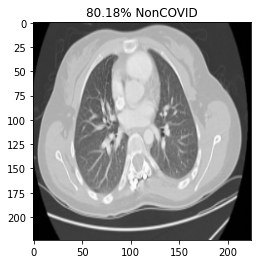

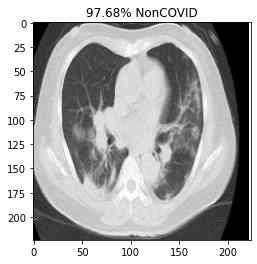

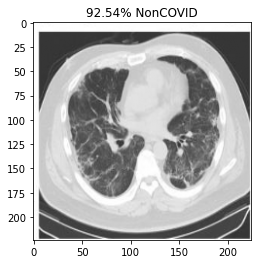

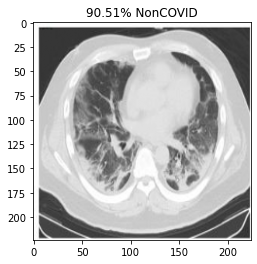

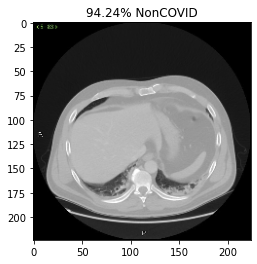

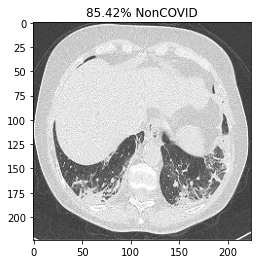

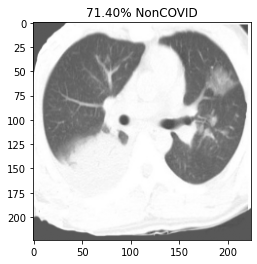

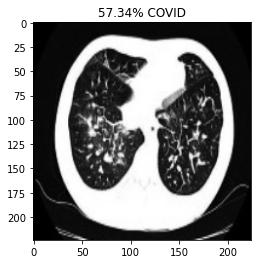

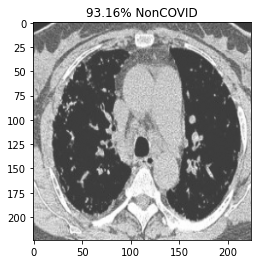

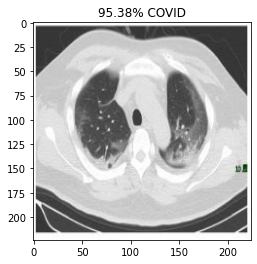

In [22]:
prediction=y_pred[0:10]
for index, probability in enumerate(prediction):
  if probability[1] > 0.5:
        plt.title('%.2f' % (probability[1]*100) + '% COVID')
  else:
        plt.title('%.2f' % ((1-probability[1])*100) + '% NonCOVID')
  plt.imshow(X_test[index])
  plt.show()

In [23]:
# Convert to Binary classes
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(y_test, axis=1)

### Plot Confusion Matrix

Confusion Matrix without Normalization


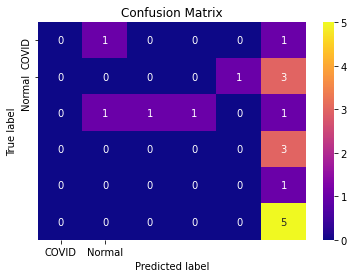

Confusion Matrix with Normalized Values


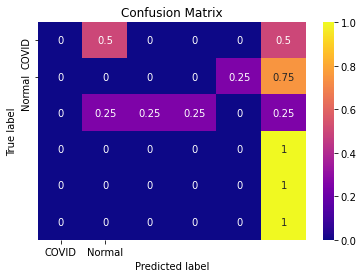

In [24]:
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(normalize):
  classes = ['COVID','Normal','Possible_Covid','Penomoni','Boronsit','possible_Penomoni']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

### **Classification Report**

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test_bin, y_pred_bin))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         4
           2       1.00      0.25      0.40         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.36      1.00      0.53         5

    accuracy                           0.32        19
   macro avg       0.23      0.21      0.15        19
weighted avg       0.30      0.32      0.22        19



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Accuracy and Loss Plots**

In [26]:
plt.figure(figsize=(10,10))

plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('xception_ct_accuracy.png')
plt.show()


KeyError: 'accuracy'

<Figure size 720x720 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Training', 'Testing'])
plt.savefig('xception_ct_loss.png')
plt.show()